In [117]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [118]:
df_train = pd.read_excel('Train.xlsx')
df_test = pd.read_excel('Test.xlsx')

df_train_X = df_train[['AT', 'V', 'AP', 'RH']]
df_train_y = df_train[['PE']]
df_test_X = df_test[['AT', 'V', 'AP', 'RH']]
df_test_y = df_test[['PE']]

df_full = pd.concat([df_train, df_test], axis=0)
df_full.reset_index(drop=True, inplace=True)
df_full

,AT,V,AP,RH,PE
0,10.54,34.03,1018.71,74.00,478.77
1,7.08,39.99,1010.55,91.44,482.83
2,14.49,41.16,1000.50,82.17,465.24
3,10.73,25.36,1009.35,100.15,469.43
4,22.88,63.91,1009.63,87.82,442.50
...,...,...,...,...,...
9563,24.99,58.79,1016.37,67.16,439.20
9564,14.22,44.99,1012.00,75.28,460.53
9565,18.76,52.90,1016.27,64.70,458.26
9566,24.82,66.54,1010.00,60.36,440.88


# Feltáró adatelemzés

## Felesleges oszlopok, sorok

Feltételezésünk szerint az oszlopok mindegyikére szükségünk van a regresszió során, így nem dobunk egy egy oszlopot sem.

A potenciálisan eldobandó sorok:
- Hiányos értékeket tartalmazó sorok
- Hibás adatokat tartalmazó sorok

In [119]:
# hiányos adatokat tartalmazó sorok száma (train)
df_full.isnull().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


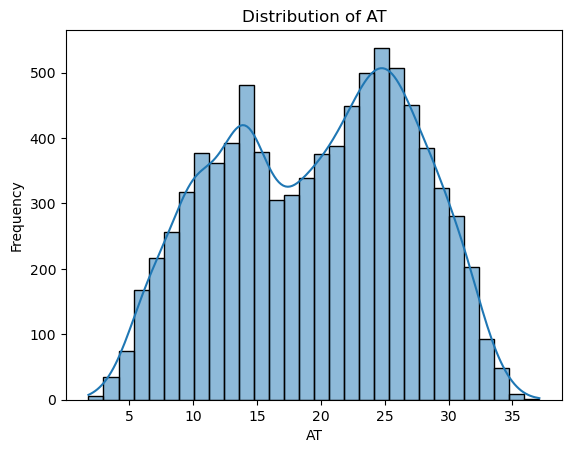

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


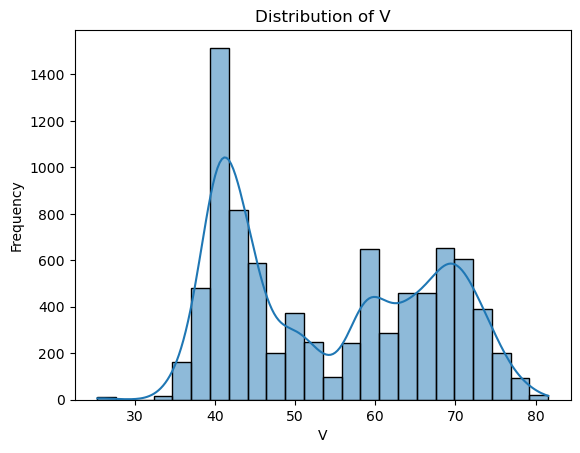

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


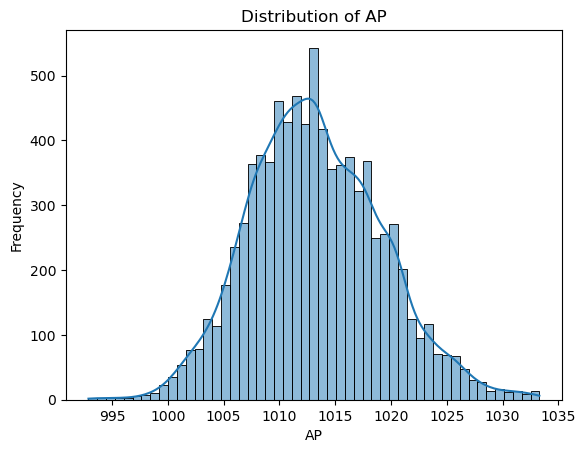

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


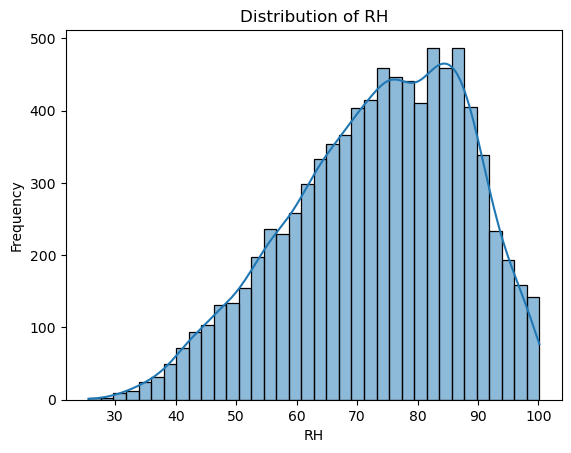

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


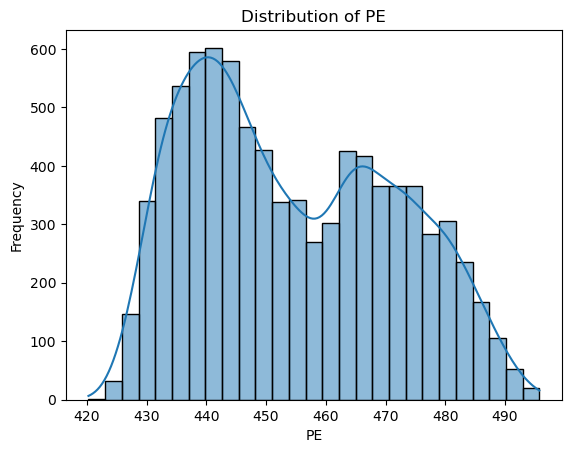

In [120]:
# Plotting the distribution of each column
for column in df_train.columns:
    sns.histplot(df_train[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

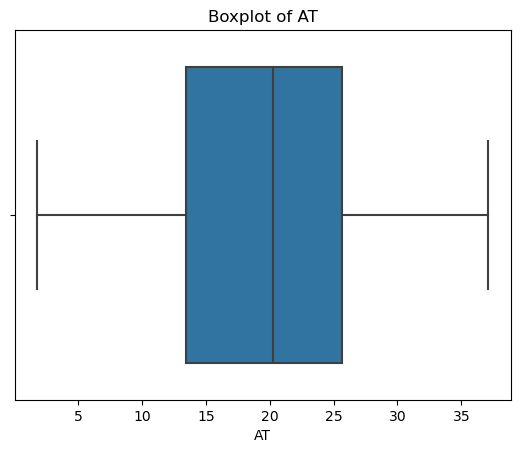

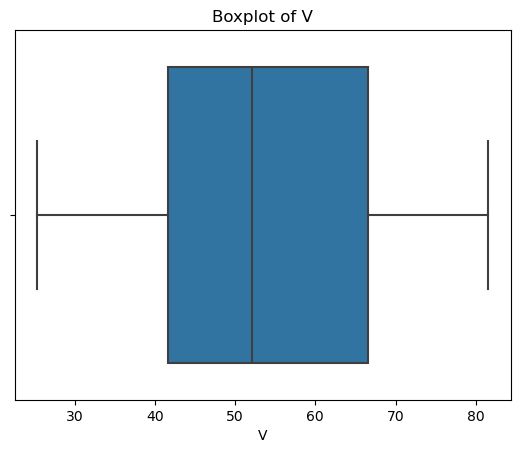

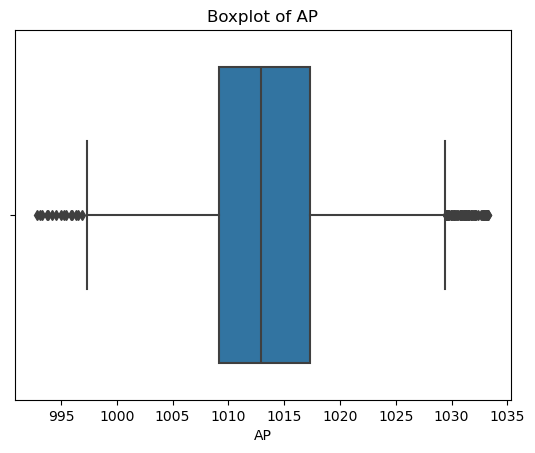

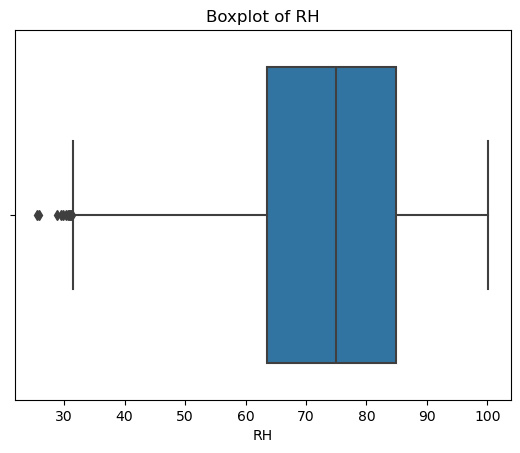

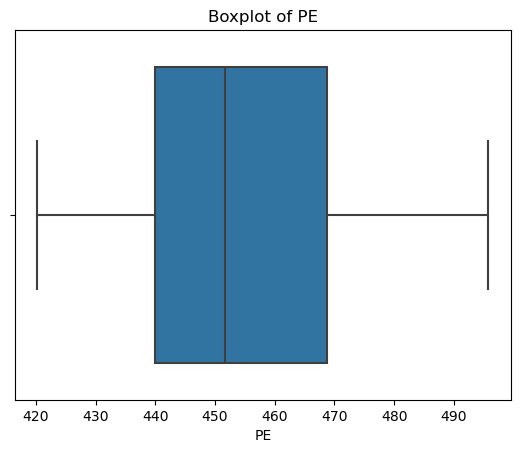

In [121]:
# Boxplots for each column
for column in df_train.columns:
    sns.boxplot(x=df_train[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

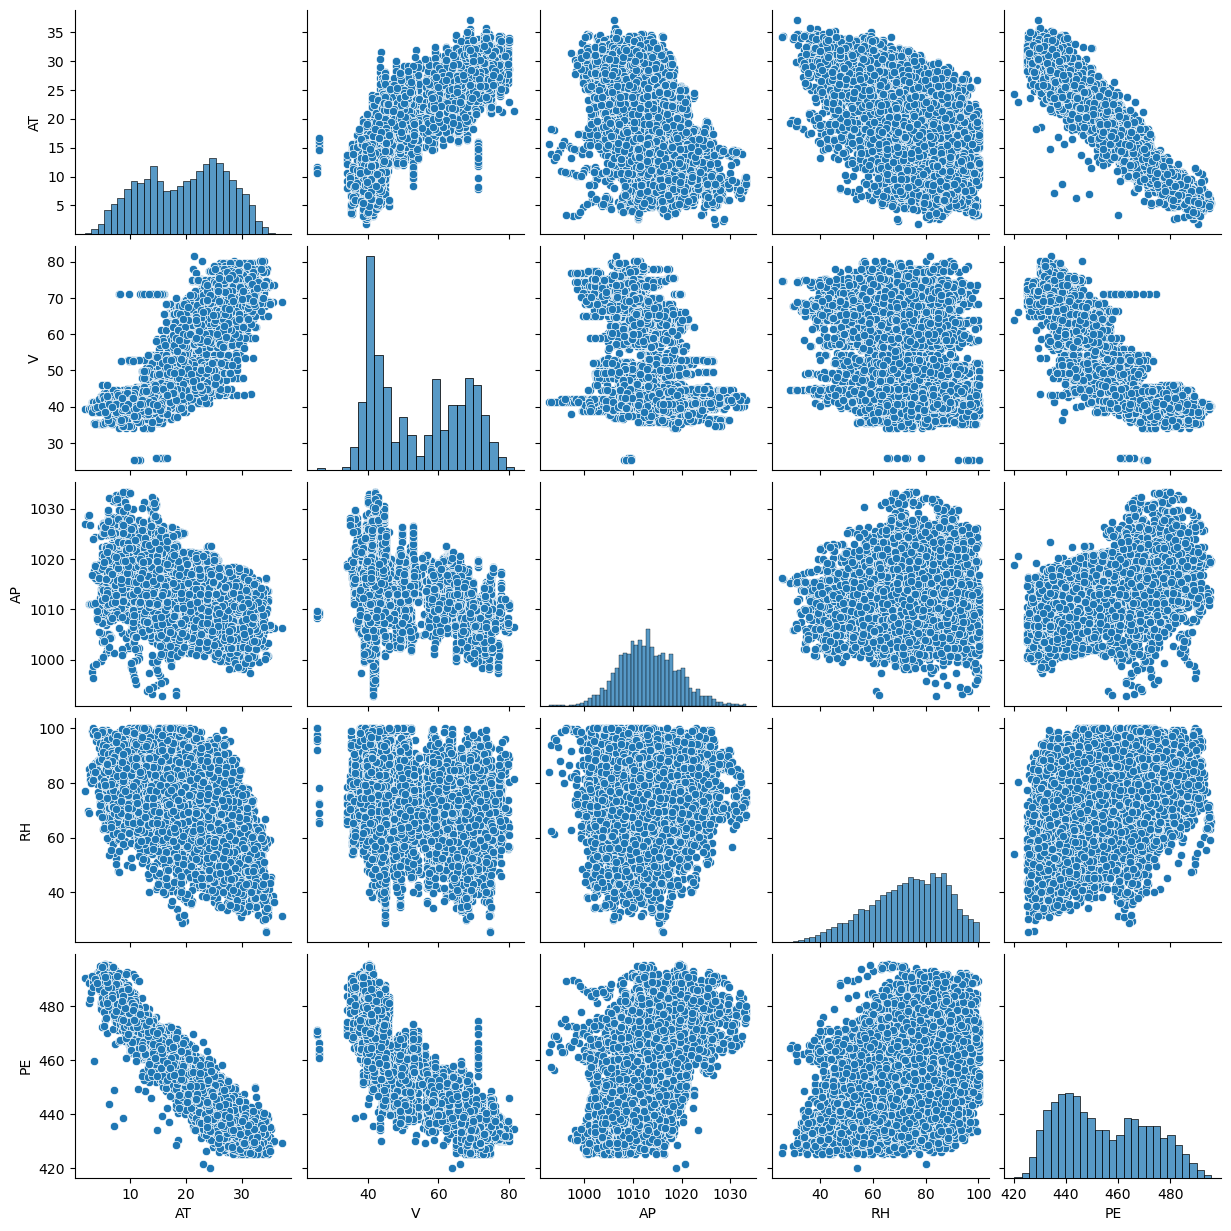

In [122]:
sns.pairplot(df_train)

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

137


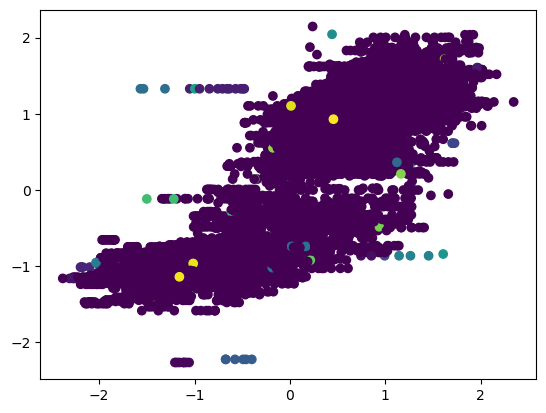

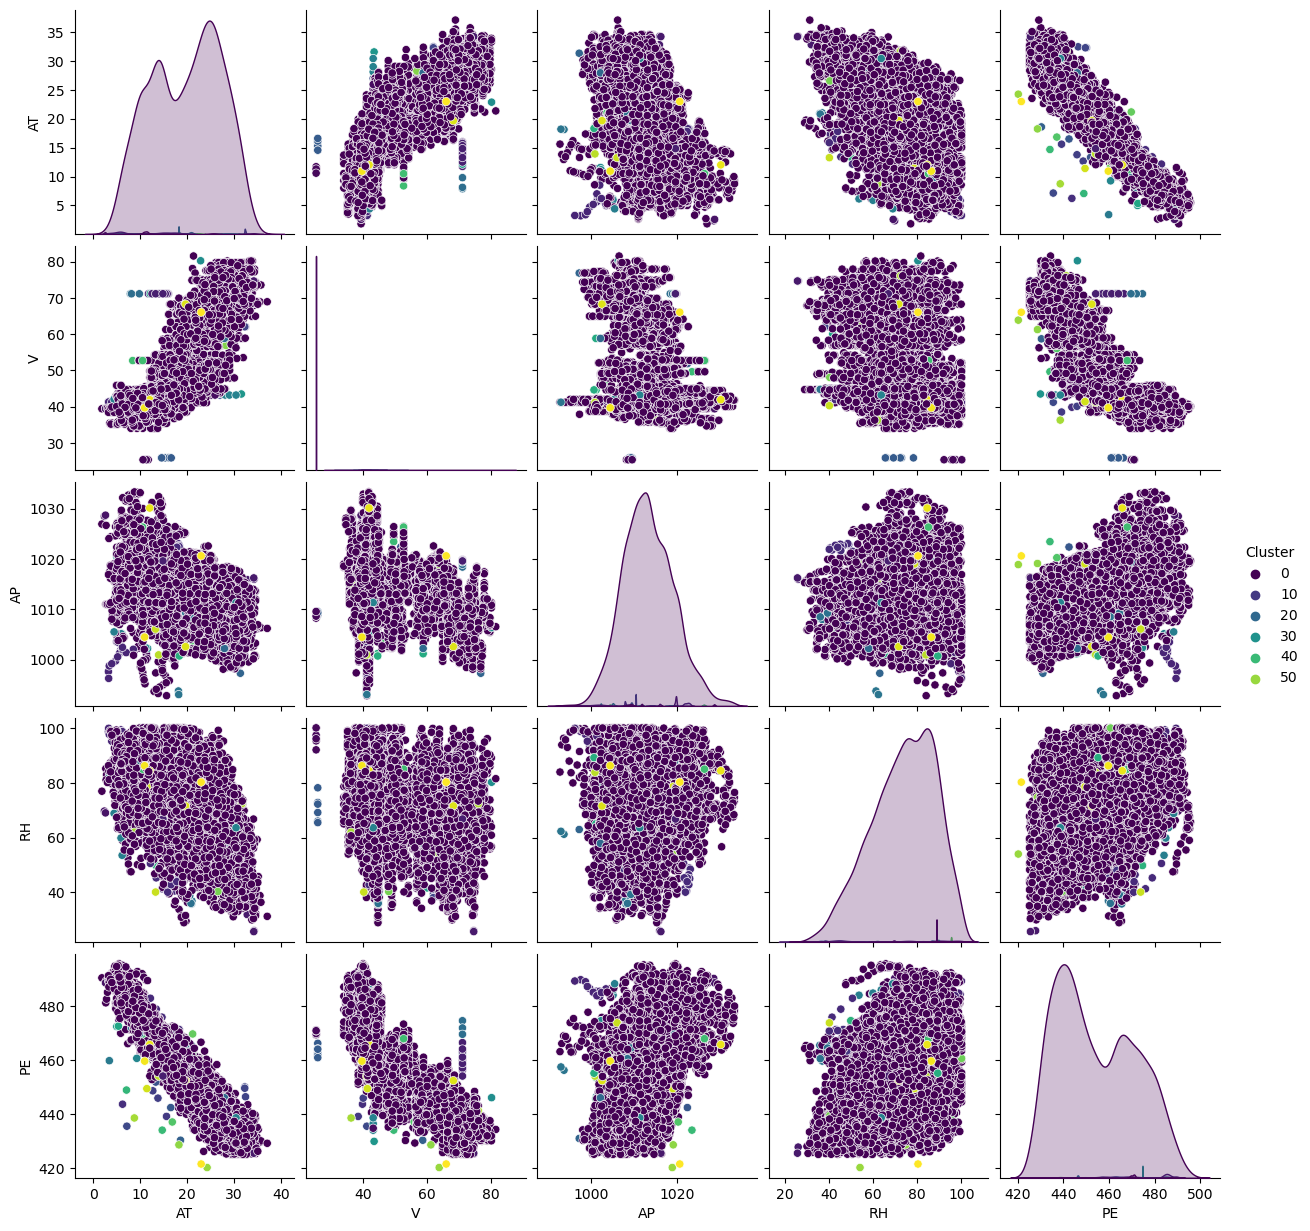

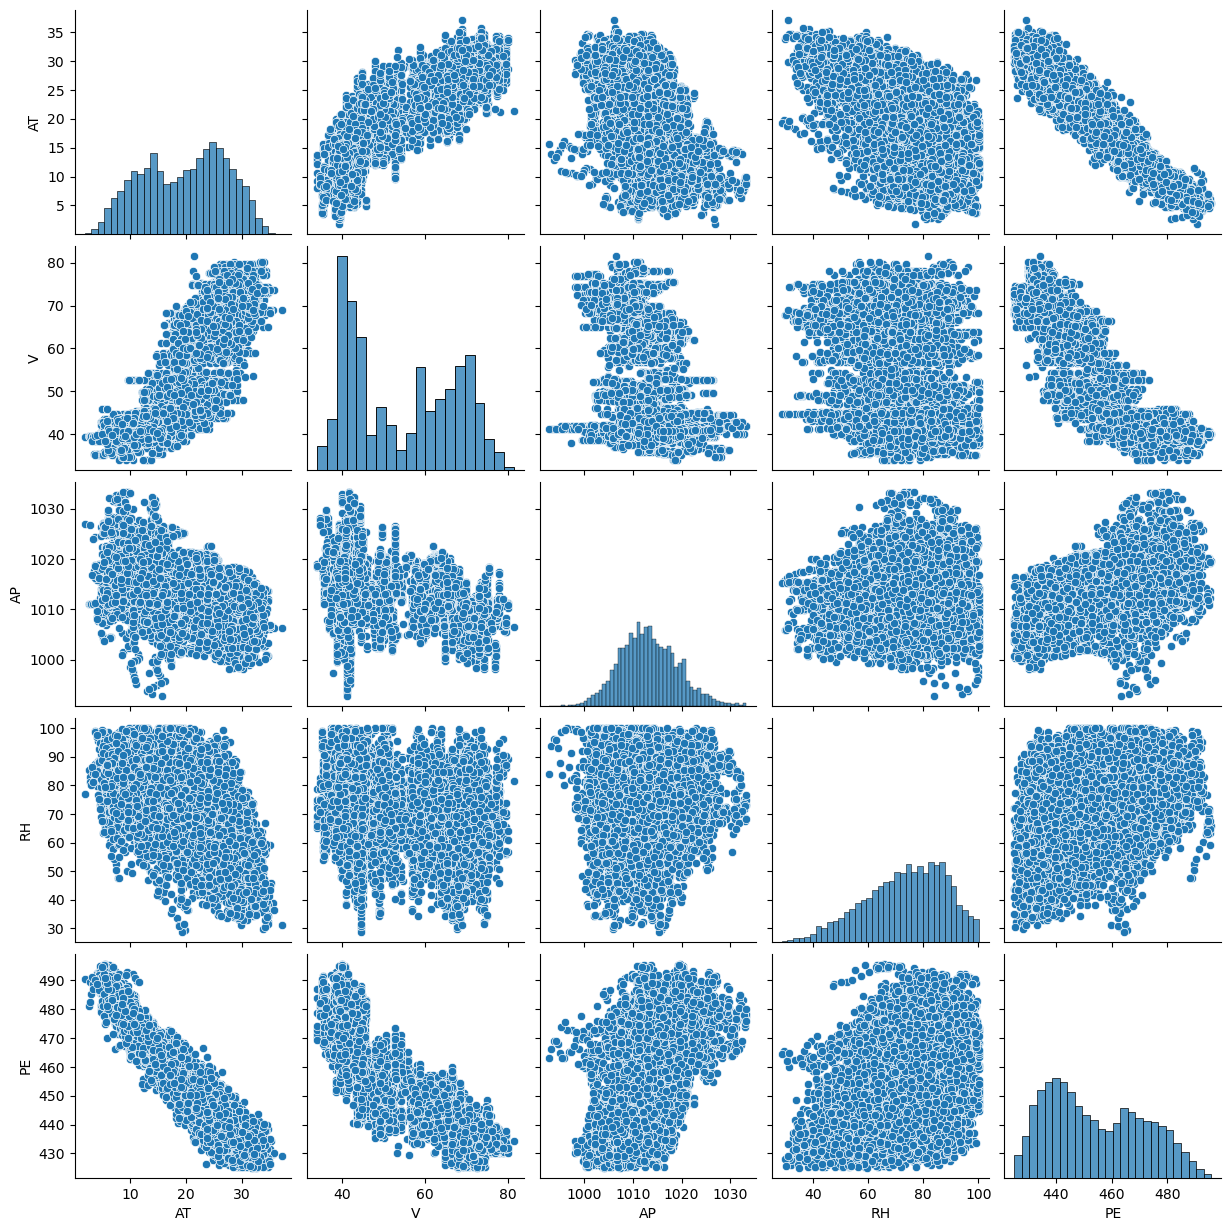

In [123]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Load the dataset
df_dirty = df_train.copy()

# Select the columns you want to use for clustering
columns = df_dirty.columns

# Standardize the data
scaler = StandardScaler()
data = scaler.fit_transform(df_dirty[columns])

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=1)
clusters = dbscan.fit_predict(data)

# Get the outlier groups
outlier_groups = df_dirty[clusters != 0]

# Visualize the clusters
plt.scatter(data[:, 0], data[:, 1], c=clusters, cmap='viridis')

# Add a column to the original dataframe with the cluster labels
df_dirty['Cluster'] = clusters

# Visualize the clusters on a pairplot
sns.pairplot(df_dirty, hue='Cluster', palette='viridis')

# New dataframe containing only rows in cluster -1
df_cleaned = df_dirty[df_dirty['Cluster'] == 0]

# drop the cluster column
df_cleaned = df_cleaned.drop(columns='Cluster')

# visualize the cleaned dataset with a simple pairplot
sns.pairplot(df_cleaned)

# number of removed rows
print(len(df_dirty) - len(df_cleaned))







In [124]:
# rearrange index of the cleaned dataset
df_cleaned.reset_index(drop=True, inplace=True)

# redefine the training dataset with the cleaned data
df_train = df_cleaned
df_train_X = df_train[['AT', 'V', 'AP', 'RH']]
df_train_y = df_train[['PE']]

df_train.corr().values

array([[ 1.        ,  0.85189578, -0.52253642, -0.54275518, -0.95140014],
       [ 0.85189578,  1.        , -0.43081364, -0.31715298, -0.87791514],
       [-0.52253642, -0.43081364,  1.        ,  0.10239665,  0.53560151],
       [-0.54275518, -0.31715298,  0.10239665,  1.        ,  0.39341128],
       [-0.95140014, -0.87791514,  0.53560151,  0.39341128,  1.        ]])

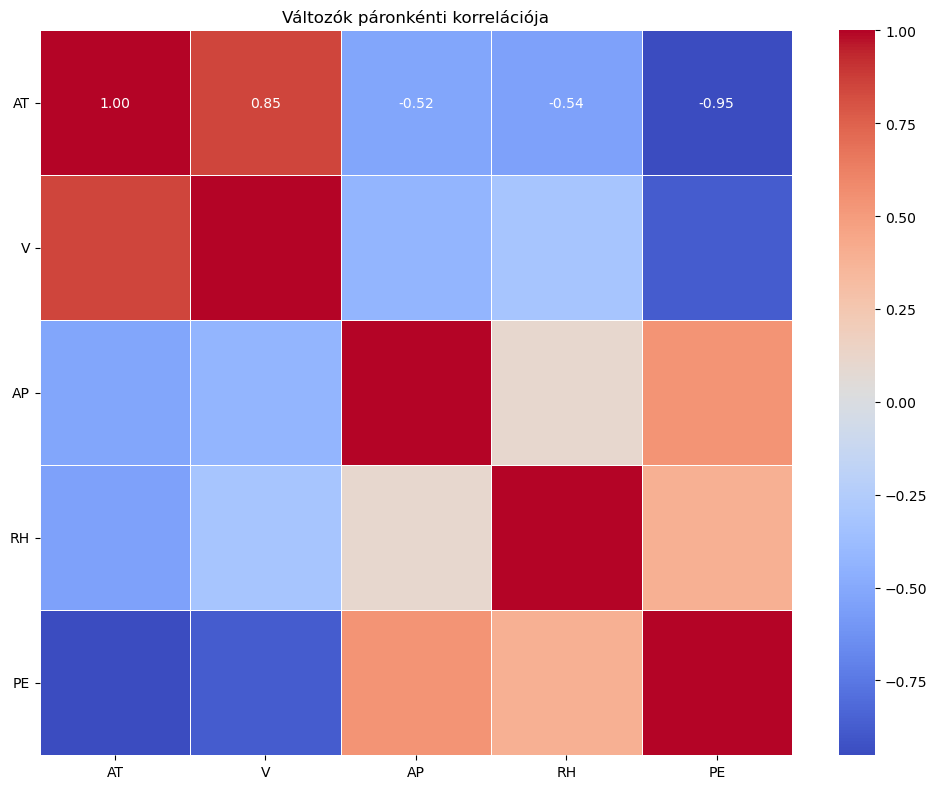

In [125]:
# Calculate correlation matrix
corr_matrix = df_train.corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Változók páronkénti korrelációja')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## Változó Szelekció vagy Dimenzió Redukció


A regressziós modellekhez használt bemeneti változók (input set-ek) meghatározása:
 - A 4 eredeti bemeneti változóból képzett részhalmazok.
 - PCA-val előállított input set(-ek)
 - PLS - Partial Least Squeares Regression - Mert ez eleve a független és függő változók kapcsolátának figyelembevételével végzi a változótranszformációt
 - Autoencoder-rel --> Korábbi módszerekből remélhetőleg látszik, hogy az 1, 2, és 3 változós input set-ek információtartalmai hogyan viszonyulnak egymáshoz. Az ezek közül jobban teljesítő méretű input set-ekre csinálok Autoencodert.
 
Nem használt dimenzió redukciós módszerek:
 - LDA: Ez cimkézési feladatok esetében ideális

### A 4 eredeti bemeneti változóból képzett részhalmazok

A részhalmazok a következők lesznek:

Egy elemű részhalmazok:
    Mivel a pairplot-okról és korrelációs mátrixból kiolvasható, hogy a Pe függő változót az AT határozza meg legpontosabban,
    így ezt az egy darab egy változót tartalmazó input set-et használom.
    - AT
    
Két, három és négy elemű részhalmazok:
    - Minden kombináció
    
    

In [126]:
### Train adatok különböző kombinációi
# 1 elemű
df_train_AT = df_train[['AT']]

# 2 elemű
df_train_AT_V = df_train[['AT', 'V']]
df_train_AT_AP = df_train[['AT', 'AP']]
df_train_AT_RH = df_train[['AT', 'RH']]
df_train_V_AP = df_train[['V', 'AP']]
df_train_V_RH = df_train[['V', 'RH']]
df_train_AP_RH = df_train[['AP', 'RH']]

# 3 elemű
df_train_AT_V_AP = df_train[['AT', 'V', 'AP']]
df_train_AT_V_RH = df_train[['AT', 'V', 'RH']]
df_train_AT_AP_RH = df_train[['AT', 'AP', 'RH']]
df_train_V_AP_RH = df_train[['V', 'AP', 'RH']]

### Test adatok különböző kombinációi
# 1 elemű
df_test_AT = df_test[['AT']]

# 2 elemű
df_test_AT_V = df_test[['AT', 'V']]
df_test_AT_AP = df_test[['AT', 'AP']]
df_test_AT_RH = df_test[['AT', 'RH']]
df_test_V_AP = df_test[['V', 'AP']]
df_test_V_RH = df_test[['V', 'RH']]
df_test_AP_RH = df_test[['AP', 'RH']]

# 3 elemű
df_test_AT_V_AP = df_test[['AT', 'V', 'AP']]
df_test_AT_V_RH = df_test[['AT', 'V', 'RH']]
df_test_AT_AP_RH = df_test[['AT', 'AP', 'RH']]
df_test_V_AP_RH = df_test[['V', 'AP', 'RH']]


### PCA

A dimenzióredukciós technikákhoz standardizálnunk kell a bemeneti változókat.

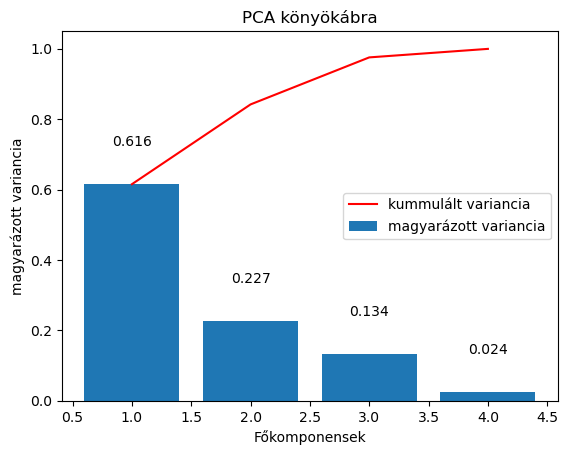

In [127]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# standard scaling of independent variables
sc = StandardScaler()
df_train_X_sc = sc.fit_transform(df_train_X)
df_test_X_sc = sc.fit_transform(df_test_X)

# PCA
pca = PCA(n_components=4)
pca.fit(df_train_X_sc)

plt.plot(range(1, df_train_X_sc.shape[1] + 1), np.cumsum(pca.explained_variance_ratio_), label='kummulált variancia', color='red')
plt.bar(range(1, df_train_X_sc.shape[1] + 1), pca.explained_variance_ratio_, label='magyarázott variancia')
plt.title('PCA könyökábra')
plt.xlabel('Főkomponensek')
plt.ylabel('magyarázott variancia')
plt.legend(loc="right")
for bar, value in enumerate(pca.explained_variance_ratio_):
    plt.text(bar+1, value+0.1, str(round(value, 3)), ha='center', va='bottom')


Az első három főkomponens mindegyike relatív fontos, a negyedik viszont elhanyagolható, így a modellek tanításához az első három főkomponenshez tartozó értékeket használom.

In [128]:
# PCA 3 dimenzióra
pca = PCA(n_components=3)
pca.fit(df_train_X_sc)

df_train_PCA3_X = pd.DataFrame(pca.transform(df_train_X_sc), columns=['PC1', 'PC2', 'PC3'])
df_test_PCA3_X = pd.DataFrame(pca.transform(df_test_X_sc), columns=['PC1', 'PC2', 'PC3'])

df_train_PCA3 = df_train_PCA3_X.copy()
df_train_PCA3['PE'] = df_train['PE']

In [129]:
pca.components_

array([[ 0.61288652,  0.55981235, -0.41035421, -0.37761048],
       [-0.0481525 ,  0.10221143, -0.63539992,  0.76387244],
       [-0.17075477, -0.59217598, -0.63774336, -0.46201063]])

### PLS

A PLS egy olyan dimenzió redukciós technika, amely figyelembe veszi a felaadt regressziós mivoltát és igyekszik megőrizni a független és függő változók közötti kapcsolatokat. Regressziós feladathoz ezért ezt a módszert is kipróbáltam. 

Ebben az esetben is skálázott független változókkal dolgoztam. 1-től 4 komponensig néztem meg a PLS modell teljesitményét a tanitóhalmazon. A kiértékeléshez 5-fold keresztvalidációt és R^2, MAE és RMSE pontszámot használtam.

   n_Components      RMSE       MAE        R2
0           4.0  4.384632  3.577893  0.934091
1           3.0  4.783133  3.843594  0.921558
2           2.0  5.071093  4.078214  0.911833
3           1.0  6.134551  4.954332  0.871027


(0.8, 0.95)

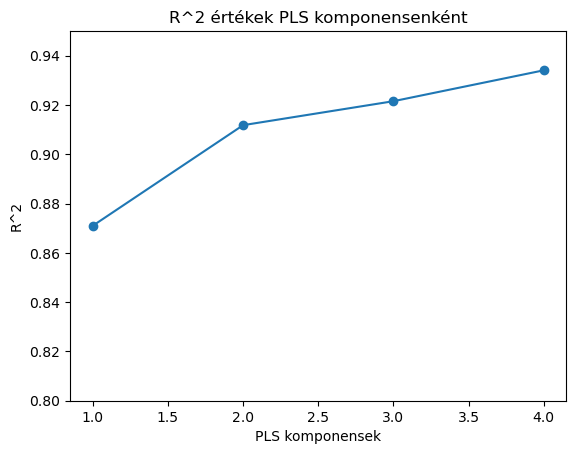

In [130]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Initialize a list to store cross-validation scores
cv_scores = pd.DataFrame(columns=['n_Components', 'RMSE', 'MAE', 'R2'])

# Define the range of components to try
components_range = range(1, 5)  # Example range, adjust as needed

# Perform k-fold cross-validation for each number of components
for n_components in components_range:
    pls = PLSRegression(n_components=n_components)
    r2_scores = cross_val_score(pls, df_train_X_sc, df_train_y, cv=5, scoring='r2')  # Using R^2 score as the metric
    mae_scores = -cross_val_score(pls, df_train_X_sc, df_train_y, cv=5, scoring='neg_mean_absolute_error')  # Using MAE score as the metric
    rmse_scores = -cross_val_score(pls, df_train_X_sc, df_train_y, cv=5, scoring='neg_root_mean_squared_error')  # Using RMSE score as the metric
    cv_scores.loc[-1] = [n_components, rmse_scores.mean(), mae_scores.mean(), r2_scores.mean()] # adding a row
    cv_scores.index = cv_scores.index + 1  # shifting index
    cv_scores = cv_scores.sort_index()  # sorting by index

print(cv_scores)


# Plotting the R-squared scores for each number of components
plt.plot(cv_scores['n_Components'].to_list(), cv_scores['R2'].to_list(), marker='o')
plt.xlabel('PLS komponensek')
plt.ylabel('R^2')
plt.title('R^2 értékek PLS komponensenként')
# set y range to 0-1
plt.ylim(0.8, 0.95)


A keresztvalidáció eredménye az, hogy a PLS modell 4 komponenssel adja a legpontosabb eredményeket r^2, MAE és RMSE esetén is. Ez azt jelenti, hogy valósznűleg nem éri meg PLS regressziót alkalmazni, de ettől függetlenül én elkésztettem a 3 és 4 komponenses PLS modelleket is.

In [131]:
# 2 komponens
pls_2comp = PLSRegression(n_components=2)
pls_2comp.fit(df_train_X_sc, df_train_y)
y_PLS2 = pls_2comp.predict(df_train_X_sc)
r2_PLS2_train = pls_2comp.score(df_train_X_sc, df_train_y)
r2_PLS2_test = pls_2comp.score(df_test_X_sc, df_test_y)

print(r2_PLS2_train, r2_PLS2_test)

# 3 komponens
pls_3comp = PLSRegression(n_components=3)
pls_3comp.fit(df_train_X_sc, df_train_y)
y_PLS3 = pls_3comp.predict(df_train_X_sc)
r2_PLS3_train = pls_3comp.score(df_train_X_sc, df_train_y)
r2_PLS3_test = pls_3comp.score(df_test_X_sc, df_test_y)

print(r2_PLS3_train, r2_PLS3_test)

# 4 komponens
pls_4comp = PLSRegression(n_components=4)
pls_4comp.fit(df_train_X_sc, df_train_y)
y_PLS4 = pls_4comp.predict(df_train_X_sc)
r2_PLS4_train = pls_4comp.score(df_train_X_sc, df_train_y)
r2_PLS4_test = pls_4comp.score(df_test_X_sc, df_test_y)

print(r2_PLS4_train, r2_PLS4_test)

df_train_PLS3_X_sc = pls_3comp.transform(df_train_X_sc)
df_train_PLS4_X_sc = pls_4comp.transform(df_train_X_sc)

df_test_PLS3_X_sc = pls_3comp.transform(df_test_X_sc)
df_test_PLS4_X_sc = pls_4comp.transform(df_test_X_sc)

0.9119215962804825 0.8999826162343414
0.921676340504423 0.9111182136897986
0.9342240038955464 0.9264326205967055


A teszt adatsoron is a 4 komponensű PLS regressziós modell adta a legjobb eredményeket.

### A következő bemeneti adatokra fogok tehát modellt illeszteni:
* 1D: AT
* 2D: minden két elemű részhalmaz az eredeti bemeneti változókból
* 3D: minden három elemű részhalmaz az eredeti bemeneti változókból, PCA, PLS3
* 4D: minden eredeti változó, PLS4

In [132]:
input_sets = [
    # 1D
    {'train': df_train_AT, 'test': df_test_AT, 'name': 'AT'},
    # 2D
    {'train': df_train_AT_V, 'test': df_test_AT_V, 'name': 'AT_V'},
    {'train': df_train_AT_AP, 'test': df_test_AT_AP, 'name': 'AT_AP'},
    {'train': df_train_AT_RH, 'test': df_test_AT_RH, 'name': 'AT_RH'},
    {'train': df_train_V_AP, 'test': df_test_V_AP, 'name': 'V_AP'},
    {'train': df_train_V_RH, 'test': df_test_V_RH, 'name': 'V_RH'},
    {'train': df_train_AP_RH, 'test': df_test_AP_RH, 'name': 'AP_RH'},
    # 3D
    {'train': df_train_AT_V_AP, 'test': df_test_AT_V_AP, 'name': 'AT_V_AP'},
    {'train': df_train_AT_V_RH, 'test': df_test_AT_V_RH, 'name': 'AT_V_RH'},
    {'train': df_train_AT_AP_RH, 'test': df_test_AT_AP_RH, 'name': 'AT_AP_RH'},
    {'train': df_train_V_AP_RH, 'test': df_test_V_AP_RH, 'name': 'V_AP_RH'},

    {'train': df_train_PCA3_X, 'test': df_test_PCA3_X, 'name': 'PCA3'},
    {'train': df_train_PLS3_X_sc, 'test': df_test_PLS3_X_sc, 'name': 'PLS3'},
    # 4D
    {'train': df_train_X, 'test': df_test_X, 'name': 'Full'},
    {'train': df_train_PLS4_X_sc, 'test': df_test_PLS4_X_sc, 'name': 'PLS4'}
]

## Regressziós modellek

Több regressziós modell teljesítményét is meghatározom a feladat során. A különböző input set-eken tanított modell típusok:
 - Lineáris regresszió
 - Polinomiális regresszió (?)
 - KNN
 - decision tree
 - random forest
 - Suppert Vector regression
 - neural network

A különböző regressziós modellek teljesítményeit a különböző bemeneteken egy közös dataframe-ben tárolom el. Minden regressziós modell + bemenet kombinációhoz eltárolom az R^2, RMSE és MAE értékeket

In [133]:
df_results = pd.DataFrame(columns=['model', 'input', 'R2_train', 'R2_test', 'RMSE_train', 'RMSE_test', 'MAE_train', 'MAE_test'])

### Lineáris Regresszió
Ez egy nagyon egyszerű modell, nincsenek hiperparamétereink, ezért nem szükséges validációs adathalmazt definiálni.

In [134]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import math
from IPython.display import display

df_results_linear_regression = pd.DataFrame(columns=['model', 'input', 'R2_train', 'R2_test', 'RMSE_train', 'RMSE_test', 'MAE_train', 'MAE_test'])

def linear_regression(input_set: dict):
    # print(input_set['name'])
    df_train = input_set['train']
    df_test = input_set['test']

    lin_reg = LinearRegression()
    lin_reg.fit(df_train, df_train_y)

    df_train_y_lin_reg = lin_reg.predict(df_train)
    df_test_y_lin_reg = lin_reg.predict(df_test)

    lin_reg_result =       {
        'model': 'Linear Regression',
        'input': input_set['name'],
        'R2_train': r2_score(df_train_y, df_train_y_lin_reg),
        'R2_test': r2_score(df_test_y, df_test_y_lin_reg), 
        'RMSE_train': math.sqrt(mean_squared_error(df_train_y, df_train_y_lin_reg)), 
        'RMSE_test': math.sqrt(mean_squared_error(df_test_y, df_test_y_lin_reg)), 
        'MAE_train': mean_absolute_error(df_train_y, df_train_y_lin_reg), 
        'MAE_test': mean_absolute_error(df_test_y, df_test_y_lin_reg)
        }

    return pd.DataFrame([lin_reg_result])

for input_set in input_sets:
    lin_reg_res = linear_regression(input_set)
    df_results_linear_regression = pd.concat([df_results_linear_regression, lin_reg_res], ignore_index=True)

# display(df_results_linear_regression)

df_results = pd.concat([df_results, df_results_linear_regression],  ignore_index=True)




C:\Users\lobon\AppData\Local\Temp\ipykernel_16008\3494449330.py:34: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_results_linear_regression = pd.concat([df_results_linear_regression, lin_reg_res], ignore_index=True)
C:\Users\lobon\AppData\Local\Temp\ipykernel_16008\3494449330.py:38: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_results = pd.concat([df_results, df_results_linear_regression],  ignore_index=True)


### Ridge és Lasso regression
A Lineáris Regressziós modell akkor képes túltanulni, ha a tanítóhalmazban a független változók száma túl nagy az adatsorokhoz képest. Ez a veszély esetünkben nem áll fenn, hiszen mindössze négy független változónk van. Ezért nincs szükségünk a Ridge és Lasso regressziós technikákra.

### Polynomial Regression
Én másodrendű polinomiális regressziót alkalmazok

In [135]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

poly_reg = PolynomialFeatures(degree = 2)

df_results_polinomial_regression = pd.DataFrame(columns=['model', 'input', 'R2_train', 'R2_test', 'RMSE_train', 'RMSE_test', 'MAE_train', 'MAE_test'])

# polynomial regression for all input sets
for input_set in input_sets:
    df_train_pol = input_set['train']
    df_test_pol = input_set['test']
    X_poly = poly_reg.fit_transform(df_train_pol)
    regressor_pol1 = LinearRegression()
    regressor_pol1.fit(X_poly, df_train_y)
    y_poli_pred_train = regressor_pol1.predict(X_poly)

    r2_pol1_train = r2_score(df_train_y, y_poli_pred_train)
    rmse_pol1_train = math.sqrt(mean_squared_error(df_train_y, y_poli_pred_train))
    mae_pol1_train = mean_absolute_error(df_train_y, y_poli_pred_train)

    X_poly_test = poly_reg.transform(df_test_pol)
    y_poli_pred_test = regressor_pol1.predict(X_poly_test)

    r2_pol1_test = r2_score(df_test_y, y_poli_pred_test)
    rmse_pol1_test = math.sqrt(mean_squared_error(df_test_y, y_poli_pred_test))
    mae_pol1_test = mean_absolute_error(df_test_y, y_poli_pred_test)

    pol1_result = {
        'model': 'Polynomial Regression (degree=2)',
        'input': input_set['name'],
        'R2_train': r2_pol1_train,
        'R2_test': r2_pol1_test,
        'RMSE_train': rmse_pol1_train,
        'RMSE_test': rmse_pol1_test,
        'MAE_train': mae_pol1_train,
        'MAE_test': mae_pol1_test
    }

    df_results_polinomial_regression = pd.concat([df_results_polinomial_regression, pd.DataFrame([pol1_result])], ignore_index=True)

df_results = pd.concat([df_results, df_results_polinomial_regression], ignore_index=True)

C:\Users\lobon\AppData\Local\Temp\ipykernel_16008\3909480854.py:39: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_results_polinomial_regression = pd.concat([df_results_polinomial_regression, pd.DataFrame([pol1_result])], ignore_index=True)


###

### KNN

C:\Users\lobon\AppData\Local\Temp\ipykernel_16008\2966864188.py:39: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_results_knn = pd.concat([df_results_knn, knn_res], ignore_index=True)
C:\Users\lobon\AppData\Local\Temp\ipykernel_16008\2966864188.py:39: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_results_knn = pd.concat([df_results_knn, knn_res], ignore_index=True)
C:\Users\lobon\AppData\Local\Temp\ipykernel_16008\2966864188.py:39: FutureWarning: The behavior of DataFrame concatenation wit

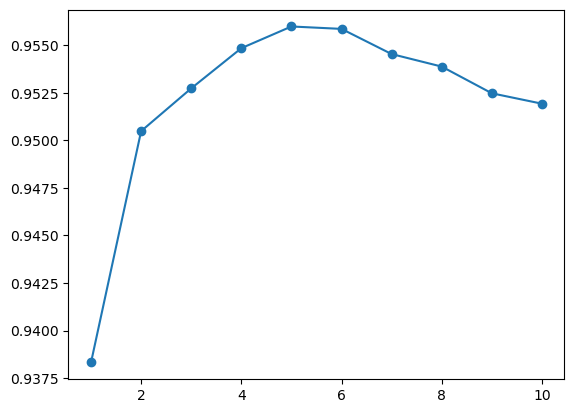

In [168]:
from sklearn.neighbors import KNeighborsRegressor

df_results_knn = pd.DataFrame(columns=['model', 'input', 'R2_train', 'R2_test', 'RMSE_train', 'RMSE_test', 'MAE_train', 'MAE_test'])

# function of KNN regression for all input sets
def knn_regression(input_set: dict, n_neighbors: int):
    df_train_knn = input_set['train']
    df_test_knn = input_set['test']

    knn = KNeighborsRegressor(n_neighbors=n_neighbors)
    knn.fit(df_train_knn, df_train_y)

    df_train_y_knn_pred = knn.predict(df_train_knn)
    df_test_y_knn_pred = knn.predict(df_test_knn)

    knn_result = {
        'model': f'KNN Regression (n_neighbors={n_neighbors})',
        'input': input_set['name'],
        'R2_train': r2_score(df_train_y, df_train_y_knn_pred),
        'R2_test': r2_score(df_test_y, df_test_y_knn_pred),
        'RMSE_train': math.sqrt(mean_squared_error(df_train_y, df_train_y_knn_pred)),
        'RMSE_test': math.sqrt(mean_squared_error(df_test_y, df_test_y_knn_pred)),
        'MAE_train': mean_absolute_error(df_train_y, df_train_y_knn_pred),
        'MAE_test': mean_absolute_error(df_test_y, df_test_y_knn_pred)
    }

    return pd.DataFrame([knn_result])

# function to return element with highest R2 score from a dataframe
def get_max_r2(df: pd.DataFrame):
    return df[df['R2_test']==df['R2_test'].max()]

# function of KNN regression for all input sets
def knn_regression_all(input_sets: list, n_neighbors: int):
    df_results_knn = pd.DataFrame(columns=['model', 'input', 'R2_train', 'R2_test', 'RMSE_train', 'RMSE_test', 'MAE_train', 'MAE_test'])

    for input_set in input_sets:
        knn_res = knn_regression(input_set, n_neighbors)
        df_results_knn = pd.concat([df_results_knn, knn_res], ignore_index=True)

    return df_results_knn


# for n_neighbors in range(1, 11) do KNN regression for all input sets
knn_results_map_r2 = {}
knn_results_map = {}
for n_neighbors in range(1, 11):
    knn_res = knn_regression_all(input_sets, n_neighbors)
    best_knn_res = get_max_r2(knn_res)
    knn_results_map[n_neighbors] = best_knn_res
    best_r2 = best_knn_res['R2_test']
    knn_results_map_r2[n_neighbors] = best_r2

# plot the best R2 score for each n_neighbors
plt.plot(knn_results_map_r2.keys(), knn_results_map_r2.values(), marker='o')


In [171]:
# concatenate the best results for each n_neighbors
df_best_knn_results = pd.concat(knn_results_map.values(), ignore_index=True)


KNN works best with K=5 neighbours

In [173]:
# calculate KNN regression for 5 neighbors
df_results_knn_5 = knn_regression_all(input_sets, 5)
df_results = pd.concat([df_results, df_results_knn_5], ignore_index=True)

C:\Users\lobon\AppData\Local\Temp\ipykernel_16008\2966864188.py:39: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_results_knn = pd.concat([df_results_knn, knn_res], ignore_index=True)


C:\Users\lobon\AppData\Local\Temp\ipykernel_16008\1230546548.py:33: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_results_dt = pd.concat([df_results_dt, dt_res], ignore_index=True)


C:\Users\lobon\AppData\Local\Temp\ipykernel_16008\1230546548.py:33: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_results_dt = pd.concat([df_results_dt, dt_res], ignore_index=True)
C:\Users\lobon\AppData\Local\Temp\ipykernel_16008\1230546548.py:33: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_results_dt = pd.concat([df_results_dt, dt_res], ignore_index=True)
C:\Users\lobon\AppData\Local\Temp\ipykernel_16008\1230546548.py:33: FutureWarning: The behavior of DataFrame concatenation with empt

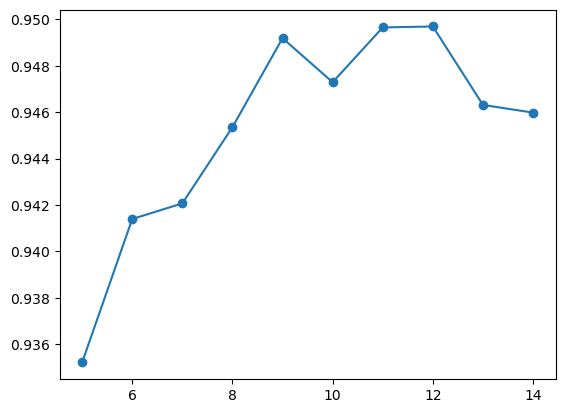

In [206]:
# function of Decision Tree regression for all input sets
from sklearn.tree import DecisionTreeRegressor

def decision_tree_regression(input_set: dict, max_depth: int):
    df_train_dt = input_set['train']
    df_test_dt = input_set['test']

    dt = DecisionTreeRegressor(max_depth=max_depth)
    dt.fit(df_train_dt, df_train_y)

    df_train_y_dt_pred = dt.predict(df_train_dt)
    df_test_y_dt_pred = dt.predict(df_test_dt)

    dt_result = {
        'model': f'Decision Tree Regression (max_depth={max_depth})',
        'input': input_set['name'],
        'R2_train': r2_score(df_train_y, df_train_y_dt_pred),
        'R2_test': r2_score(df_test_y, df_test_y_dt_pred),
        'RMSE_train': math.sqrt(mean_squared_error(df_train_y, df_train_y_dt_pred)),
        'RMSE_test': math.sqrt(mean_squared_error(df_test_y, df_test_y_dt_pred)),
        'MAE_train': mean_absolute_error(df_train_y, df_train_y_dt_pred),
        'MAE_test': mean_absolute_error(df_test_y, df_test_y_dt_pred)
    }

    return pd.DataFrame([dt_result])

# function for Decision Tree regression for all input sets
def decision_tree_regression_all(input_sets: list, max_depth: int):
    df_results_dt = pd.DataFrame(columns=['model', 'input', 'R2_train', 'R2_test', 'RMSE_train', 'RMSE_test', 'MAE_train', 'MAE_test'])

    for input_set in input_sets:
        dt_res = decision_tree_regression(input_set, max_depth)
        df_results_dt = pd.concat([df_results_dt, dt_res], ignore_index=True)

    return df_results_dt

# for max_depth in range(1, 11) do Decision Tree regression for all input sets
dt_results_map_r2 = {}
dt_results_map = {}
for max_depth in range(5, 15):
    dt_res = decision_tree_regression_all(input_sets, max_depth)
    best_dt_res = get_max_r2(dt_res)
    dt_results_map[max_depth] = best_dt_res
    best_r2 = best_dt_res['R2_test']
    dt_results_map_r2[max_depth] = best_r2

# plot the best R2 score for each max_depth
plt.plot(dt_results_map_r2.keys(), dt_results_map_r2.values(), marker='o')


In [207]:

def get_result_at_depth(depth: int) -> float:
    return dt_results_map_r2[depth].values[0]

# key of max R2 value from the dictionary
dt_best_max_depth = 0
dt_best_max_depth_value = 0
for depth in range(5, 15, 1):
    if get_result_at_depth(depth) > dt_best_max_depth_value:
        dt_best_max_depth = depth
        dt_best_max_depth_value = get_result_at_depth(depth)

print('Best Decision tree max_depth:' + str(dt_best_max_depth) + " R2 value: " + str(dt_best_max_depth_value))

# calculate Decesion Tree regression for best max depth
df_results_dt_best = decision_tree_regression_all(input_sets, dt_best_max_depth)

df_results = pd.concat([df_results, df_results_dt_best], ignore_index=True)


Best Decision tree max_depth:12 R2 value: 0.9496901803070577


C:\Users\lobon\AppData\Local\Temp\ipykernel_16008\1230546548.py:33: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_results_dt = pd.concat([df_results_dt, dt_res], ignore_index=True)


### Random Forest regression

 - random forest
 - Suppert Vector regression
 - neural network

## Results

 - Do y_predicted - y Plots